# Проект Принятие решений в бизнесе

## Описание проекта

Отделом маркетинга и отделом аналитики совместно подготовлен список гипотез для увеличения выручки интернет-магазина.

<b>Задачи в рамках проекта:</b>
- приоритизировать выдвинутые гипотезы, 
- запустить A/B-тест,
- проанализировать результаты A/B-теста. 

<b>В ходе анализа будут рассмотрены:</b>
- график кумулятивной выручки по группам;
- график кумулятивного среднего чека по группам;
- график относительного изменения кумулятивного среднего чека группы B к группе A;
- график кумулятивного среднего количества заказов на посетителя по группам;
- график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A;
- точечный график количества заказов по пользователям и 95-й и 99-й перцентили количества заказов на пользователя;
- точечный график стоимостей заказов и 95-й и 99-й перцентили стоимости заказов;
- статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным;
- статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным;
- статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным;
- статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

<b>По результатам анализа необходимо принять решение:</b>
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

## Описание данных

Для проведения анализа у нас есть 3 файла с данными:

<b>Данные для первой части</b>

Файл /datasets/hypothesis.csv. 

Hypothesis — краткое описание гипотезы;  
Reach — охват пользователей по 10-балльной шкале;  
Impact — влияние на пользователей по 10-балльной шкале;  
Confidence — уверенность в гипотезе по 10-балльной шкале;  
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

<b>Данные для второй части</b>

Файл /datasets/orders.csv. 

transactionId — идентификатор заказа;  
visitorId — идентификатор пользователя, совершившего заказ;  
date — дата, когда был совершён заказ;  
revenue — выручка заказа;  
group — группа A/B-теста, в которую попал заказ.  

Файл /datasets/visitors.csv. 

date — дата;  
group — группа A/B-теста;  
visitors — количество пользователей в указанную дату в указанной группе A/B-теста


## Часть 1. Приоритизация гипотез

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

In [1]:
#импортируем необходимые библиотеки 
import pandas as pd
import datetime as dt
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

In [27]:
#изучим файл
data = pd.read_csv('/datasets/hypothesis.csv')

pd.options.display.max_colwidth = 120
display(data)
data.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В файле 9 гипотез со значениями Reach, Impact, Confidence и Efforts для каждой. Пропуски отсутствуют. Тип данных во всех столбцах соответствует содержащимся в них значениям. Приведем названия столбцов к нижнему регистру.

In [3]:
data.columns = data.columns.str.lower()

### Применяем фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [4]:
data['ICE'] = ((data['impact'] * data['confidence']) / data['efforts']).round(2)

display(data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


По методу ICE наиболее перспективными являются гипотезы:
- (8) Запустить акцию, дающую скидку на товар в день рождения, 
- (0) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей,
- (7) Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

### Применяем фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [5]:
data['RICE'] = (data['reach'] * data['impact'] * data['confidence']) / data['efforts']
display(data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По методу RICE наиболее перспективными являются гипотезы: 
- (7) Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, 
- (2) Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа, 
- (0) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей, 
- (6) Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

<b>Вывод:</b> По методу ICE самой приоритетной была гипотеза (8) Запустить акцию, дающую скидку на товар в день рождения, но после применения метода RICE она опустилась на 5 место, так как эта гипотеза охватывает наименьшее количество пользователей. Параметр Reach равен 1, в то время как у других гипотез он выше.

Приоритетность гипотез (2) Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа, и (6) Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию, также выросла с учетом охвата пользователей.

Приоритетность гипотез (0) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей, и (7) Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, несколько изменилась после применения метода RICE, но они являются приоритетными в обоих случаях. Поэтому эти гипотезы следует проверить в первую очередь.

## Часть 2. Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

In [6]:
#изучим файлы
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

display(orders.head(5))
display(orders.info())

display(visitors.head(5))
display(visitors.info())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

In [7]:
#заменим названия нескольких столбцов в orders на змеиный регистр
orders.rename(
    columns = {'transactionId':'transaction_id', 'visitorId':'visitor_id'}, inplace=True
)

Изменим тип данных в столбцах date в обоих датафреймах.

In [8]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Пропусков в данных нет. Проверим файлы на наличие явных дубликатов.

In [9]:
orders.drop_duplicates()
visitors.drop_duplicates()

orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Явные дубликаты отсутствуют. 

<b>Вывод:</b> Имеющиеся данные довольно "чистые". Пропусков и явных дубликатов не выявлено. Приступим к анализу проведенного A/B-теста.

### Построим график кумулятивной выручки по группам

In [10]:
#создим датафрейм с уникальными парами значений 'date' и 'group' таблицы orders
datesGroups = orders[['date','group']].drop_duplicates() 

ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                    orders['group'] == x['group'])]\
    .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique',
          'visitor_id' : 'nunique', 
          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']
)

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max',
          'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']
)

ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                    orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max',
          'transaction_id' : 'nunique','visitor_id' : 'nunique', 
          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']
)

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                      visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max',
          'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']
)

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


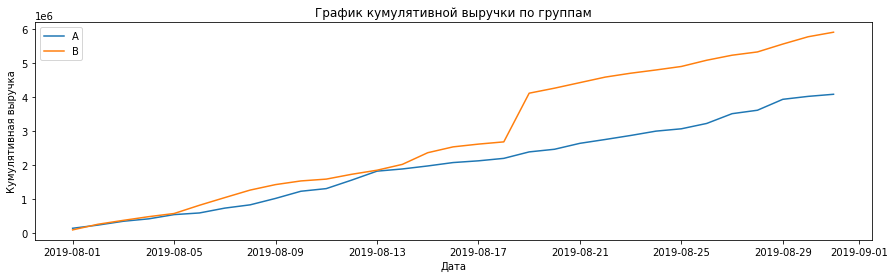

In [11]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure().set_figwidth(15)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.legend()
plt.show()

Во второй половине теста сегмент B вырвался вперёд по кумулятивной выручке и продолжал лидировать весь остаток теста. Возможно, скачок в середине теста произошел из-за того, что в сегменте B был оформлен аномально крупный заказ.

### Построим график кумулятивного среднего чека по группам

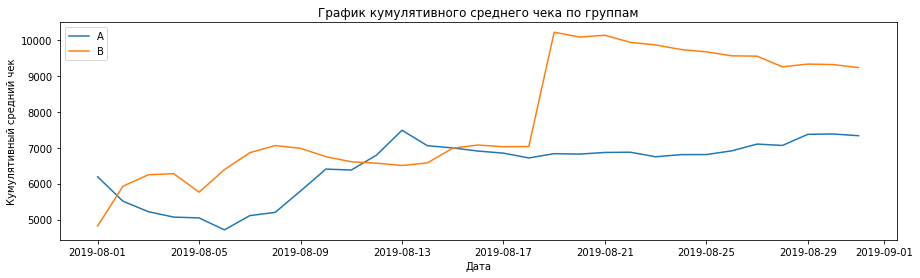

In [12]:
plt.figure().set_figwidth(15)
plt.plot(cumulativeRevenueA['date'], 
         cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], 
         cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.legend(loc='upper left')
plt.show()

Во второй половине теста сегмент B вырвался вперёд по среднему чеку, но потом начал немного снижаться. Хотя все равно лидировал в сравнении с сегментом A.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

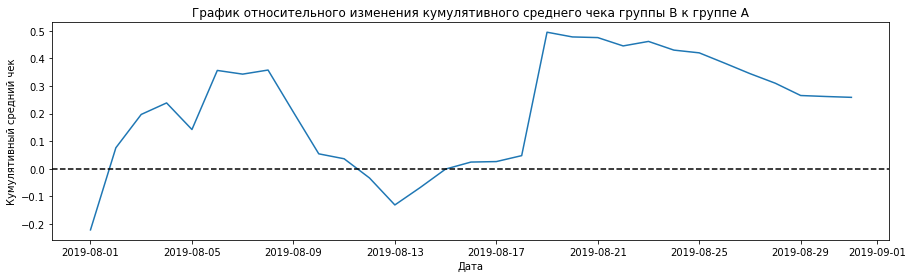

In [13]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure().set_figwidth(15)
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.show()

Результаты теста значительно и резко менялись в несколько дат. Возможно, в эти даты были совершены аномальные заказы.

### Построим график кумулятивного среднего количества заказов на посетителя по группам

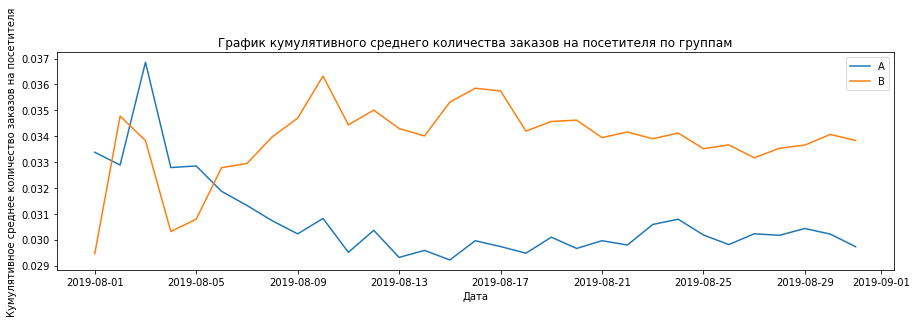

In [14]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure().set_figwidth(15)
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее количество заказов на посетителя')
plt.legend()
plt.show()

В начале теста сегмент A имел большее кумулятивное среднее количество заказов, но после резкого пика начал сначала также резко снижаться, после чего стабилизировался на низком уровне.

Сегмет B в самом начале резко взлетел, после чего резко снизился, и стал расти уже постепенно, и стабилизировался на высоком уровне.

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

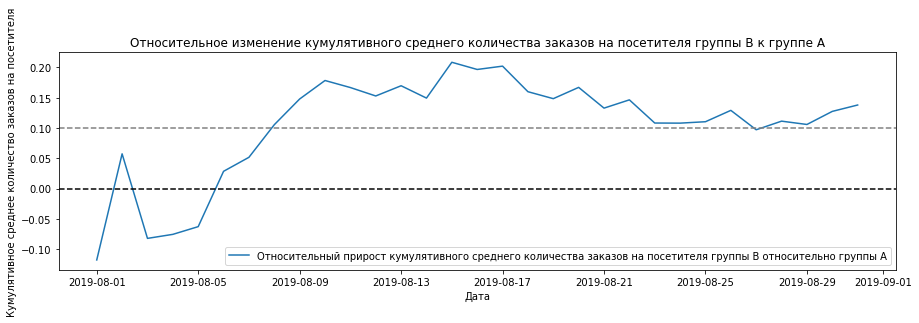

In [15]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure().set_figwidth(15)
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее количество заказов на посетителя')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.legend(loc='lower right')
plt.show()

В начале теста сегмент B был ниже по метрике, чем сегмент A. Но довольно быстро сегмент B стал расти и показывать лучшие показатели, чем сегмент A. В итоге прирост сегмента B относительно сегмента A зафиксировался в районе чуть выше 10%.

### Построим точечный график количества заказов по пользователям

In [16]:
ordersByUsers = ( 
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id' : 'nunique',})
    .sort_values(by='transaction_id',ascending=False)
)
ordersByUsers.columns = ['user_id', 'orders']

display(ordersByUsers.head(10))

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


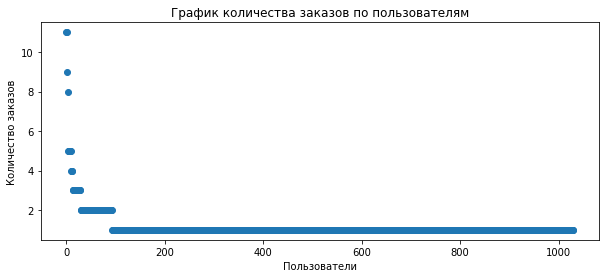

In [17]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure().set_figwidth(10)
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('График количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.show()

Видим, что большая часть клиентов делает только по 1 заказу. Небольшая часть клиентов делала по 2 заказа. Клиентов, делавших более 3 заказов немного. А клиентов, сделавших более 5 заказов, буквально единицы.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [18]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Не более 5% клиентов сделали больше 2 заказов и не более 1% клиентов сделали больше 4 заказов. С учетом точечного графика выше и рассчитанных перцентилей можно сказать, что граница нормальных и аномальных заказов приходится на 95-м перцентиле. Сверх этого уровня уже идет аномальное количество заказов.

### Построим точечный график стоимостей заказов

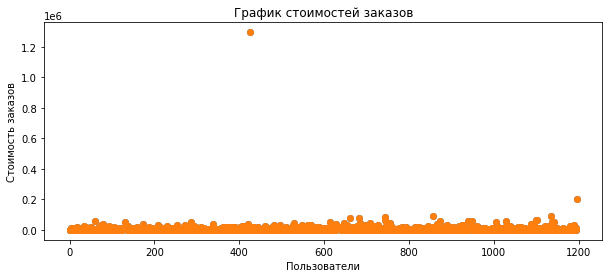

In [19]:
plt.figure().set_figwidth(10)
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.scatter(x_values, orders['revenue'])
plt.show()

В основном заказы оформляются на примерно одинаковые суммы у всех клиентов. Есть несколько выделяющихся выбросов, один из которых заказ на сумму более 1.2 млн. Этот заказ в интернет-магазине выглядит весьма аномально. 

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [20]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более 5% клиентов сделали заказы на сумму больше 28000.00 и не более 1% клиентов заказы на сумму больше 58233.20. Заказы свыше 28000 можно считать аномальными.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

Посчитаем статистическую значимость различий в среднем числе заказов на посетителя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

In [21]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
 
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('p-value')
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительное различие в среднем между группами')
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


p-value
0.017
Относительное различие в среднем между группами
0.138


P-value значительно меньше 0.05, поэтому нулевую гипотезу отвергаем. Анализ "сырых" данных показывает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы B к конверсии группы A равен 13,8%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. 

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [22]:
print('p-value')
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы B')
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value
0.729
Относительный прирост среднего чека группы B
0.259


P-value больше 0.05, статистически значимых отличий в среднем чеке между группами нет. Но относительное различие среднего чека между сегментами 26%.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Найденные выше 95-й и 99-й перцентили средних чеков равны 28000. и 58233.2. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2. и 4. заказа на пользователя.

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 28 000. Так мы уберём 5% пользователей с наибольшим числом заказов и до 5% пользователей с дорогими заказами. 

In [23]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['revenue']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1121    28060
723     28350
137     28490
960     28750
73      29499
dtype: int64

69


Всего 69 аномальных пользователей. 

In [24]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value')
print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие в среднем между группами')
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value
0.01155
Относительное различие в среднем между группами
0.170


Как и в случае с "сырыми" данными, статистическая значимость достигнута. Сегмент B значительно лучше сегмента A.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [25]:
print('p-value')
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный прирост среднего чека группы B')
print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)



p-value
0.661
Относительный прирост среднего чека группы B
0.234


P-value снизился, но все равно сильно больше 0.05. Относительный прирост среднего чека группы B также немного снизился с 26 до 23%. Общие выводы по результатам теста по чистым данным не изменились. 

### Вывод
По результатам проведенного A/B-теста можно сделать вывод, что статистически значимые различия между сегментом A и сегментом B есть как по по среднему количеству заказов, так и по среднему чеку. Сегмент B показывает результаты лучше в среднем на 20%. 

На данном этапе можно остановить тест и зафиксировать победу группы B. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент A на самом деле лучше сегмента B — практически нулевая.

